In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
customer = pd.read_csv('kunden.csv', delimiter= ';')
table_customer = pd.DataFrame(customer)

visitor = pd.read_csv('besucher.csv', delimiter= ';', decimal= ',')
table_visitor = pd.DataFrame(visitor)

geodata = pd.read_csv('geo.txt', delimiter= '\t')
table_geo = pd.DataFrame(geodata)

print(table_customer)
print(table_visitor)
print(table_geo)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]
     Alter     Einkommen  Geschlecht  Zeit KundeNr
0       30  39919.095335           0  29.0   K1814
1       41  53430.673086           0  27.0   K1544
2       64  73163.216927           0  32.0   K1945
3       41  36761.482581           0  44.0   K1825


In [3]:
sorted_customer = table_customer.sort_values('KundeNr')
sorted_visitor = table_visitor.sort_values('KundeNr')
sorted_geo = table_geo.sort_values('KundeNr')

# Filtern der Zeilen von 'K1005' bis 'K1104'
customer_filtered = sorted_customer[(sorted_customer['KundeNr'] >= 'K1005') & (sorted_customer['KundeNr'] <= 'K1104')]
visitor_filtered = sorted_visitor[(sorted_visitor['KundeNr'] >= 'K1005') & (sorted_visitor['KundeNr'] <= 'K1104')]
geo_filtered = sorted_geo[(sorted_geo['KundeNr'] >= 'K1005') & (sorted_geo['KundeNr'] <= 'K1104')]

# Anzeigen der gefilterten DataFrames
print("Gefilterte Zeilen von table_customer (K1005 bis K1104):")
print(customer_filtered)

print("\nGefilterte Zeilen von table_visitor (K1005 bis K1104):")
print(visitor_filtered)

print("\nGefilterte Zeilen von table_geo (K1005 bis K1104):")
print(geo_filtered)

Gefilterte Zeilen von table_customer (K1005 bis K1104):
     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
816     69    84021.0  133358.19         1.0  56.0   K1005
579     47    46708.0   70719.18         1.0  31.0   K1006
221     54    57917.0   94386.02         1.0  47.0   K1007
950     62    57795.0   85730.62         0.0  38.0   K1008
967     69    77887.0  126098.91         0.0  51.0   K1009
..     ...        ...        ...         ...   ...     ...
240     61    82624.0  134755.80         1.0  59.0   K1100
422     39    37905.0   61717.86         1.0  32.0   K1101
758     39    40159.0   67170.69         1.0  37.0   K1102
813     48    45545.0   75700.83         0.0  30.0   K1103
829     63    80414.0  101554.64         1.0  49.0   K1104

[100 rows x 6 columns]

Gefilterte Zeilen von table_visitor (K1005 bis K1104):
Empty DataFrame
Columns: [Alter, Einkommen, Geschlecht, Zeit, KundeNr]
Index: []

Gefilterte Zeilen von table_geo (K1005 bis K1104):
     KundeNr        Nie

In [4]:
 ## überschneiden sich die KundeNr

In [5]:
sum_rows = (1104+891)

print(sum_rows)

1995


In [6]:
table_customer_resorted = table_customer[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Preis', 'Zeit']]
table_customer_sort_by_KNr = table_customer_resorted.sort_values('KundeNr')

table_visitor_resorted = table_visitor[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Zeit']]
table_visitor_sort_by_KNr = table_visitor_resorted.sort_values('KundeNr')

print(table_customer_sort_by_KNr)
print(table_visitor_sort_by_KNr)

    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit
476   K0001         1.0     68    89437.0  114481.90  62.0
892   K0002         1.0     58    65271.0  106258.99  44.0
225   K0003         1.0     44    48195.0   85705.57  29.0
174   K0004         0.0     37    48957.0   76412.36  36.0
991   K0005         0.0     50    56621.0   92898.67  40.0
..      ...         ...    ...        ...        ...   ...
240   K1100         1.0     61    82624.0  134755.80  59.0
422   K1101         1.0     39    37905.0   61717.86  32.0
758   K1102         1.0     39    40159.0   67170.69  37.0
813   K1103         0.0     48    45545.0   75700.83  30.0
829   K1104         1.0     63    80414.0  101554.64  49.0

[1104 rows x 6 columns]
    KundeNr  Geschlecht  Alter     Einkommen  Zeit
454   K1105           0     42  57149.498007  35.0
812   K1106           1     34  43358.564350  33.0
229   K1107           1     33  45748.426936  55.0
400   K1108           1     57  58633.969764  32.0
744   K1109 

In [17]:
table_visitor_sort_by_KNr

,KundeNr,Geschlecht,Alter,Einkommen,Zeit
454,K1105,0,42,57149.498007,35.0
812,K1106,1,34,43358.564350,33.0
229,K1107,1,33,45748.426936,55.0
400,K1108,1,57,58633.969764,32.0
744,K1109,0,43,53592.012684,31.0
...,...,...,...,...,...
18,K1991,1,48,59967.313282,21.0
799,K1992,1,67,81521.761443,21.0
592,K1993,0,40,41616.572980,48.0
72,K1994,1,49,76602.788840,19.0


In [18]:
customer_merge = pd.merge(table_customer_sort_by_KNr, table_geo, on = 'KundeNr', how = 'outer')
customer_geo = customer_merge.head(1104)
visitor_merge = pd.merge(table_visitor_sort_by_KNr, table_geo, on='KundeNr')
visitor_geo = visitor_merge.head(891)

print("outer join:\n", customer_geo)
print("outer Join:\n", visitor_geo)

outer join:
      KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0        Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0            NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0         Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0         Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100         1.0   61.0    82624.0  134755.80  59.0         Berlin
1100   K1101         1.0   39.0    37905.0   61717.86  32.0         Hessen
1101   K1102         1.0   39.0    40159.0   67170.69  37.0  Niedersachsen
1102   K1103         0.0   48.0    45545.0   75700.83  30.0         Berlin
1103   K1104         1.0   63.0    80414.0  101554.64  49.0        Sachsen

[1104 rows x 7 columns]
outer Join:
     KundeNr  Geschlecht  Alter     Einkommen  Zei

In [19]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

print(
    )
visitor_isna_rows = visitor_geo[visitor_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(visitor_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
23    K0024         NaN   41.0    46542.0   63477.00  40.0   
89    K0090         NaN   64.0    83452.0  133180.70  62.0   
165   K0166         NaN   53.0    49798.0   61329.51  39.0   
324   K0325         NaN   52.0    66602.0   98756.07  45.0   
789   K0790         NaN   67.0    91461.0  131748.07  66.0   

           Niederlassung  
23     Baden-Württemberg  
89         Niedersachsen  
165  Nordrhein-Westfalen  
324               Bayern  
789               Berlin  

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []


In [20]:
counts = customer_geo['Geschlecht'].value_counts(normalize=True)
percentage_1 = counts.get(1.0, 0)
percentage_0 = counts.get(0.0, 0)

print(f"Prozentualer Anteil von 1.0: {percentage_1:.2%}")
print(f"Prozentualer Anteil von 0.0: {percentage_0:.2%}")

Prozentualer Anteil von 1.0: 63.79%
Prozentualer Anteil von 0.0: 36.21%


In [21]:
nan_indices = customer_geo[customer_geo['Geschlecht'].isnull()].index
replacement_values = np.random.choice([1.0, 0.0], size=len(nan_indices), p=[percentage_1, percentage_0])
customer_geo.loc[nan_indices, 'Geschlecht'] = replacement_values
customer_geo_noNaN = customer_geo.rename(columns={'Geschlecht': 'customer_geo_noNaN'})

customer_geo_noNaN = customer_geo
visitor_geo_noNaN = visitor_geo

print(customer_geo_noNaN)
print(visitor_geo_noNaN)

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0        Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0            NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0         Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0         Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100         1.0   61.0    82624.0  134755.80  59.0         Berlin
1100   K1101         1.0   39.0    37905.0   61717.86  32.0         Hessen
1101   K1102         1.0   39.0    40159.0   67170.69  37.0  Niedersachsen
1102   K1103         0.0   48.0    45545.0   75700.83  30.0         Berlin
1103   K1104         1.0   63.0    80414.0  101554.64  49.0        Sachsen

[1104 rows x 7 columns]
    KundeNr  Geschlecht  Alter     Einkommen  Zeit          Niederlassung
0

In [22]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []


In [23]:
print(customer_geo.dtypes)

print(
    )

print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Preis            float64
Zeit             float64
Niederlassung     object
dtype: object

KundeNr           object
Geschlecht         int64
Alter              int64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [25]:
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_a = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_a:
    customer_geo_is_int = customer_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_b = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_b:
    visitor_geo_is_int = visitor_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.


In [60]:
visitor_geo

,KundeNr,Geschlecht,Alter,Einkommen,Zeit,Niederlassung
0,K1105,0,42,57149.498007,35.0,Hessen
1,K1106,1,34,43358.564350,33.0,Berlin
2,K1107,1,33,45748.426936,55.0,Niedersachsen
3,K1108,1,57,58633.969764,32.0,Thüringen
4,K1109,0,43,53592.012684,31.0,Nordrhein-Westfalen
...,...,...,...,...,...,...
886,K1991,1,48,59967.313282,21.0,Hessen
887,K1992,1,67,81521.761443,21.0,Baden-Württemberg
888,K1993,0,40,41616.572980,48.0,Nordrhein-Westfalen
889,K1994,1,49,76602.788840,19.0,Berlin


In [27]:
print("Also convertieren wir diese Spalten in integer")
print(
    )
customer_geo_retype = customer_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype = visitor_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Also convertieren wir diese Spalten in integer

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001           1     68    89437.0  114481.90    62        Sachsen
1      K0002           1     58    65271.0  106258.99    44            NRW
2      K0003           1     44    48195.0   85705.57    29         Hessen
3      K0004           0     37    48957.0   76412.36    36         Bayern
4      K0005           0     50    56621.0   92898.67    40         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100           1     61    82624.0  134755.80    59         Berlin
1100   K1101           1     39    37905.0   61717.86    32         Hessen
1101   K1102           1     39    40159.0   67170.69    37  Niedersachsen
1102   K1103           0     48    45545.0   75700.83    30         Berlin
1103   K1104           1     63    80414.0  101554.64    49        Sachsen

[1104 rows x 7 columns]

KundeNr           object
G

In [28]:
print("Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_c = ['Einkommen', 'Preis']

for col in columns_are_int_c:
    customer_geo_is_int_c = customer_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int_c:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )

print("Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_d = ['Einkommen']

for col in columns_are_int_d:
    visitor_geo_is_int_d = visitor_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int_d:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?

Nicht alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.
Nicht alle Werte in der Spalte 'Preis' sind ganze Zahlen.

Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?

Nicht alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.


In [29]:
print("Welchen Datentyp haben 'Einkommen' und 'Preis'?")
print(
    )
print(customer_geo_retype.dtypes)

Welchen Datentyp haben 'Einkommen' und 'Preis'?

KundeNr           object
Geschlecht         int64
Alter              int64
Einkommen        float64
Preis            float64
Zeit               int64
Niederlassung     object
dtype: object


In [31]:
print("Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.")
print(
    )
customer_geo_retype['Einkommen'] = pd.to_numeric(customer_geo_retype['Einkommen'], errors='coerce')
customer_geo_retype['Preis'] = pd.to_numeric(customer_geo_retype['Preis'], errors='coerce')

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].astype(float)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].astype(float)

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].round(2)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].round(2)

print("Customer")
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype['Einkommen'] = pd.to_numeric(visitor_geo_retype['Einkommen'], errors='coerce')

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].astype(float)

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].round(2)

print("Visitor")
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001           1     68    89437.0  114481.90    62        Sachsen
1      K0002           1     58    65271.0  106258.99    44            NRW
2      K0003           1     44    48195.0   85705.57    29         Hessen
3      K0004           0     37    48957.0   76412.36    36         Bayern
4      K0005           0     50    56621.0   92898.67    40         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100           1     61    82624.0  134755.80    59         Berlin
1100   K1101           1     39    37905.0   61717.86    32         Hessen
1101   K1102           1     39    40159.0   67170.69    37  Niedersachsen
1102   K1103           0     48    45545.0   75700.83    30         Berlin
1103   K1104           1     63    80414.0  101554.64    49        Sa

In [32]:
print("Treten unter den Values für 'Niederlassung Doppelungen auf?")
print(
    )
Niederlassung_unique_values_customer = customer_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_customer)
print(
    )
Niederlassung_unique_values_visitor = visitor_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_visitor)
print(
    )
print("Ja."" Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.")

Treten unter den Values für 'Niederlassung Doppelungen auf?

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']

['Hessen' 'Berlin' 'Niedersachsen' 'Thüringen' 'Nordrhein-Westfalen'
 'Baden-Württemberg' 'Bayern' 'Hamburg' 'Sachsen' 'Brandenburg' 'BERLIN'
 'Düsseldorf' 'NRW' 'Berlin-Charlottenburg']

Ja. Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.


In [33]:
customer_geo_retype['Niederlassung'] = customer_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})

visitor_geo_retype['Niederlassung'] = visitor_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})
print("Customer")
print(customer_geo_retype)
print(
    )
print("Visitor")
print(visitor_geo_retype)

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1     68    89437.0  114481.90    62   
1      K0002           1     58    65271.0  106258.99    44   
2      K0003           1     44    48195.0   85705.57    29   
3      K0004           0     37    48957.0   76412.36    36   
4      K0005           0     50    56621.0   92898.67    40   
...      ...         ...    ...        ...        ...   ...   
1099   K1100           1     61    82624.0  134755.80    59   
1100   K1101           1     39    37905.0   61717.86    32   
1101   K1102           1     39    40159.0   67170.69    37   
1102   K1103           0     48    45545.0   75700.83    30   
1103   K1104           1     63    80414.0  101554.64    49   

            Niederlassung  
0                 Sachsen  
1     Nordrhein-Westfalen  
2                  Hessen  
3                  Bayern  
4                  Bayern  
...                   ...  
1099               Berlin  
1100      

In [34]:
print("Sind nun noch Doppelungen vorhanden?")
  
filtered_df_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_customer.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_customer)
else:
    print("\nKeine ungewollten Werte gefunden.")

filtered_df_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_visitor.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_visitor)
else:
    print("\nKeine ungewollten Werte gefunden.")

Sind nun noch Doppelungen vorhanden?

Keine ungewollten Werte gefunden.

Keine ungewollten Werte gefunden.


In [35]:
print(visitor_geo.dtypes)

KundeNr           object
Geschlecht         int64
Alter              int64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [ ]:
# Visuelle & Statistische Ausreißerbereinigung von Customer

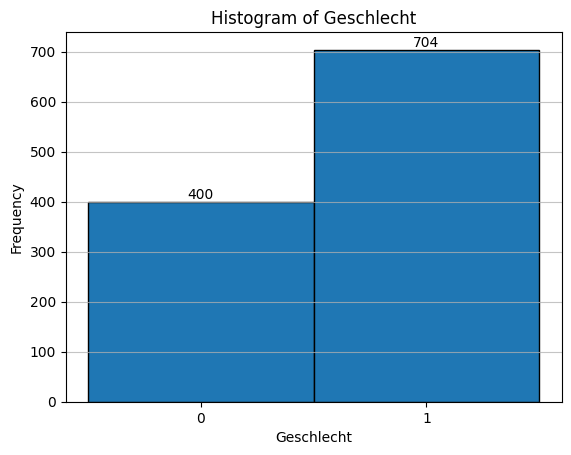

In [36]:
plt.hist(customer_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')  # Bins für 0 und 1 festlegen
plt.xticks([0, 1], ['0', '1'])  # Beschriftungen der x-Achse festlegen
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogram of Geschlecht')
for i in range(2):  # 0 und 1
    count = customer_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

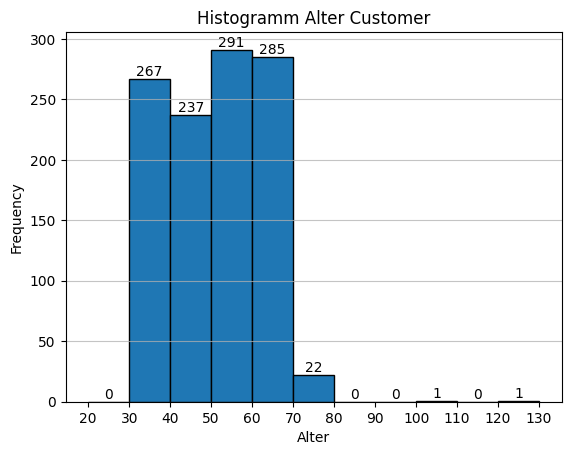

Untergrenze für Ausreißer: 8.5
Obergrenze für Ausreißer: 92.5
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
38    K0039           1    120    61857.0  104214.07    52  Baden-Württemberg
493   K0494           0    100    88749.0  119134.23    64             Bayern
Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.
Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.
In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.

Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median


In [37]:
n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  # Bins von 15 bis 135 in 10er-Schritten festlegen
plt.xticks(range(20, 140, 10))  # 10er-Schritte auf der x-Achse festlegen
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Customer')

# Anzahl der Werte über jedem Balken anzeigen
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)  # Gitterlinien hinzufügen
plt.show()

q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifizieren von Ausreißern
outliers = customer_geo_retype[(customer_geo_retype['Alter'] < lower_bound) | (customer_geo_retype['Alter'] > upper_bound)]

print("Untergrenze für Ausreißer:", lower_bound)
print("Obergrenze für Ausreißer:", upper_bound)
print("Ausreißer:")
print(outliers)
print("Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.")
print("Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.")
print("In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.")
print(
)
print("Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median")    


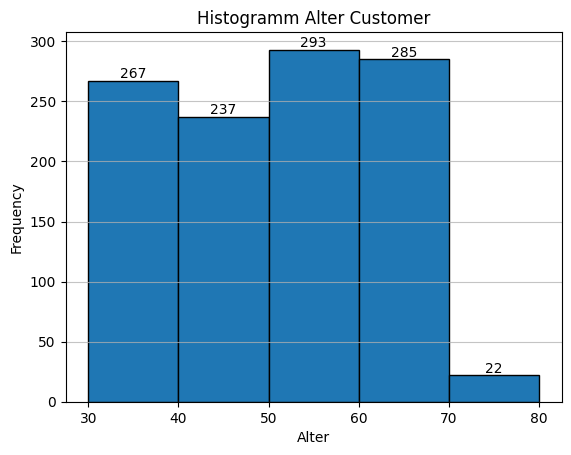

In [38]:
median = customer_geo_retype['Alter'].median()

# Berechnung des Interquartilsabstands (IQR) für die Spalte 'Alter'
q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

customer_geo_retype['Alter'] = customer_geo_retype['Alter'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(30, 90, 10), edgecolor='black')  
plt.xticks(range(30, 90, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Customer')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

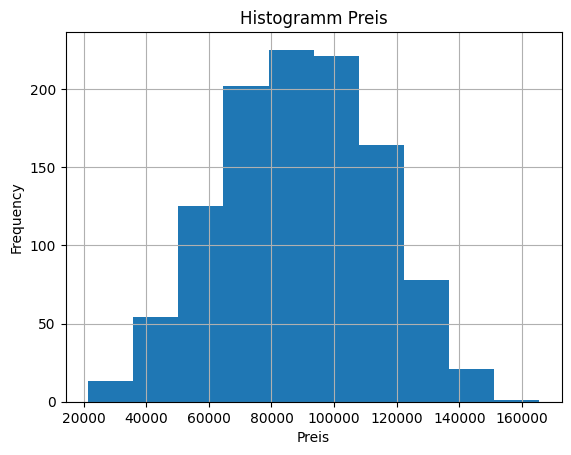

Untergrenze: 15883.493750000001
Obergrenze: 161819.30375
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
414   K0415           1   68.0   107689.0  165482.31    60  Niedersachsen


In [39]:
customer_geo_retype['Preis'].hist()
plt.xlabel('Preis')
plt.ylabel('Frequency')
plt.title('Histogramm Preis')
plt.show()

q1 = customer_geo_retype['Preis'].quantile(0.25)
q3 = customer_geo_retype['Preis'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

# Identifizierung der Ausreißer
outliers = customer_geo_retype[(customer_geo_retype['Preis'] < lower_bound) | (customer_geo_retype['Preis'] > upper_bound)]
print("Ausreißer:")
print(outliers)

In [40]:
print(visitor_geo.min())
print(customer_geo.describe())

KundeNr                 K1105
Geschlecht                  0
Alter                      30
Einkommen        10802.033307
Zeit                      3.0
Niederlassung          BERLIN
dtype: object
        Geschlecht        Alter     Einkommen          Preis         Zeit
count  1104.000000  1104.000000  1.104000e+03    1104.000000  1104.000000
mean      0.637681    50.481884  9.644748e+05   88975.198714    44.375906
std       0.480888    12.225059  3.009470e+07   24464.067781    10.848040
min       0.000000    30.000000 -6.284037e+04   21471.650000    12.000000
25%       0.000000    40.000000  4.663850e+04   70609.422500    37.000000
50%       1.000000    51.000000  5.901300e+04   88931.455000    44.000000
75%       1.000000    61.000000  7.029800e+04  107093.375000    52.000000
max       1.000000   120.000000  1.000000e+09  165482.310000    80.000000


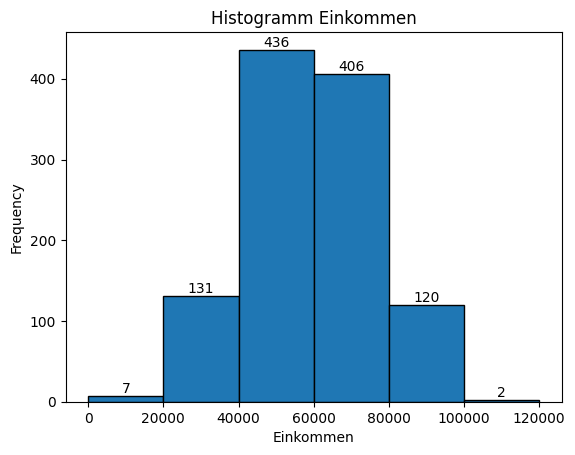

1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch
Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.
Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.


In [41]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]

plt.hist(customer_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen')
for i in range(len(bins)-1):
    count = ((customer_geo_retype['Einkommen'] >= bins[i]) & (customer_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

print("1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch")
print("Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.")
print("Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.")

In [42]:
valid_mean = customer_geo_retype[(customer_geo_retype['Einkommen'] >= 0) & (customer_geo_retype['Einkommen'] <= 500000)]['Einkommen'].mean()

# Ersetzen der Ausreißer durch den Durchschnitt
customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].apply(lambda x: valid_mean if x < 0 or x > 500000 else x)

# Drucken der ersetzen Zeilen (Ausreißer)
replaced_values = customer_geo_retype[(customer_geo_retype['Einkommen'] < 0) | (customer_geo_retype['Einkommen'] > 500000)]

# Ergebnis anzeigen
print("\nDataFrame nach der Ersetzung:")
print(customer_geo_retype.describe())



DataFrame nach der Ersetzung:
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1104.000000  1104.000000    1104.000000    1104.000000  1104.000000
mean      0.637681    50.375000   58841.233212   88975.198714    44.375906
std       0.480888    11.951426   16603.953365   24464.067781    10.848040
min       0.000000    30.000000       0.000000   21471.650000    12.000000
25%       0.000000    40.000000   46662.750000   70609.422500    37.000000
50%       1.000000    51.000000   59011.500000   88931.455000    44.000000
75%       1.000000    61.000000   70281.750000  107093.375000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    80.000000


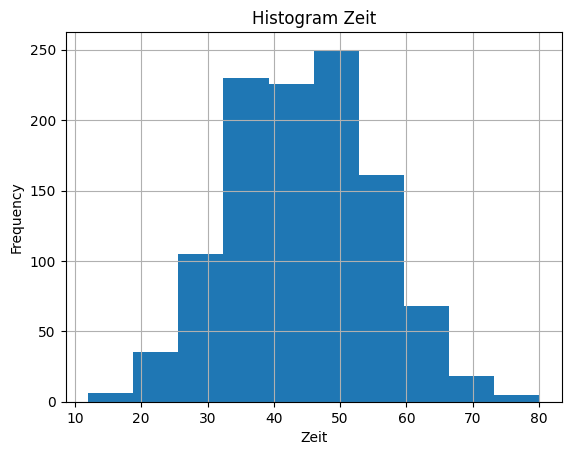

In [43]:
customer_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit')
plt.show()

In [45]:
q1 = customer_geo_retype['Zeit'].quantile(0.25)
q3 = customer_geo_retype['Zeit'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

outliers = customer_geo_retype[(customer_geo_retype['Zeit'] < lower_bound) | (customer_geo_retype['Zeit'] > upper_bound)]
print("Ausreißer:")
print(outliers)

non_outliers_mean = customer_geo_retype[(customer_geo_retype['Zeit'] >= lower_bound) & (customer_geo_retype['Zeit'] <= upper_bound)]['Zeit'].mean()
customer_geo_retype['Zeit'] = customer_geo_retype['Zeit'].apply(lambda x: non_outliers_mean if x < lower_bound or x > upper_bound else x)
print(customer_geo_retype.describe())

print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 20. Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

Untergrenze: 14.5
Obergrenze: 74.5
Ausreißer:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1104.000000  1104.000000    1104.000000    1104.000000  1104.000000
mean      0.637681    50.375000   58841.233212   88975.198714    44.372495
std       0.480888    11.951426   16603.953365   24464.067781    10.582091
min       0.000000    30.000000       0.000000   21471.650000    15.000000
25%       0.000000    40.000000   46662.750000   70609.422500    37.000000
50%       1.000000    51.000000   59011.500000   88931.455000    44.000000
75%       1.000000    61.000000   70281.750000  107093.375000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    74.000000
Wir setzen die Untergrenze in Sachen 'Zeit' auf 20. Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.
Die Obergrenze Setzen wir mit 90 hoch. Wir begründen d

In [ ]:
# Visuelle & Statistische Ausreißerbereinigung von Customer

In [46]:
print(visitor_geo.describe())

       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936188   35.166105
std      0.494156   11.865889   16164.358221   10.476802
min      0.000000   30.000000   10802.033307    3.000000
25%      0.000000   40.000000   47816.611417   28.000000
50%      1.000000   49.000000   59163.823681   35.000000
75%      1.000000   60.000000   71001.378839   43.000000
max      1.000000   70.000000  108569.087021   68.000000


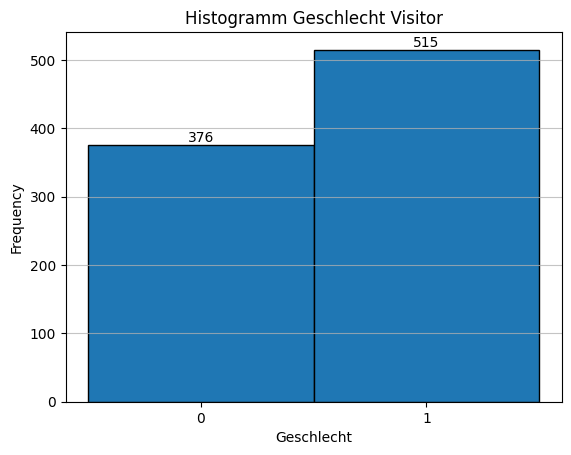

In [47]:
plt.hist(visitor_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogramm Geschlecht Visitor')
for i in range(2):  # 0 und 1
    count = visitor_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

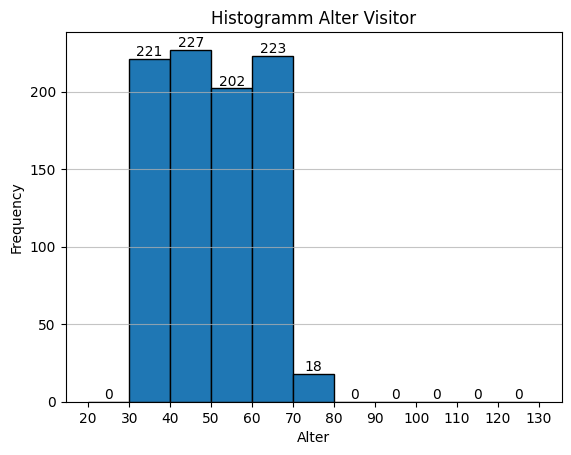

In [48]:
n, bins, patches = plt.hist(visitor_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  
plt.xticks(range(20, 140, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Visitor')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

In [49]:
print("Keine Ausreißer")

Keine Ausreißer


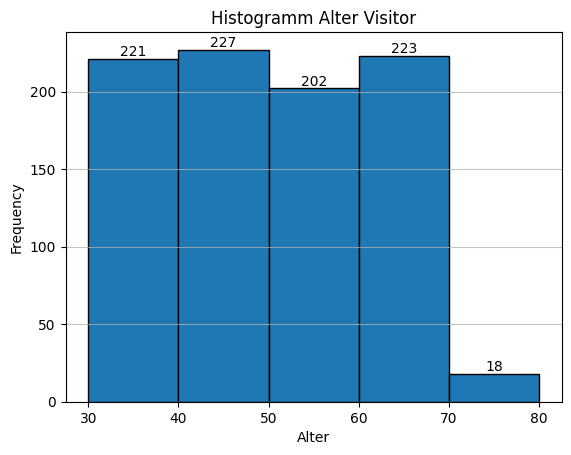

In [50]:
n, bins, patches = plt.hist(visitor_geo_retype['Alter'], bins=range(30, 90, 10), edgecolor='black')  
plt.xticks(range(30, 90, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Visitor')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

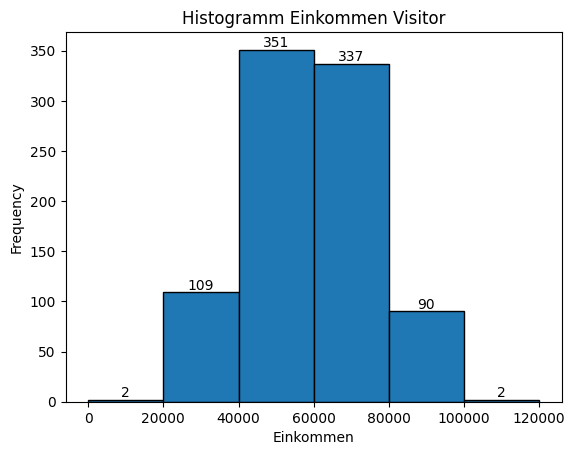

In [51]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]

plt.hist(visitor_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen Visitor')
for i in range(len(bins)-1):
    count = ((visitor_geo_retype['Einkommen'] >= bins[i]) & (visitor_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

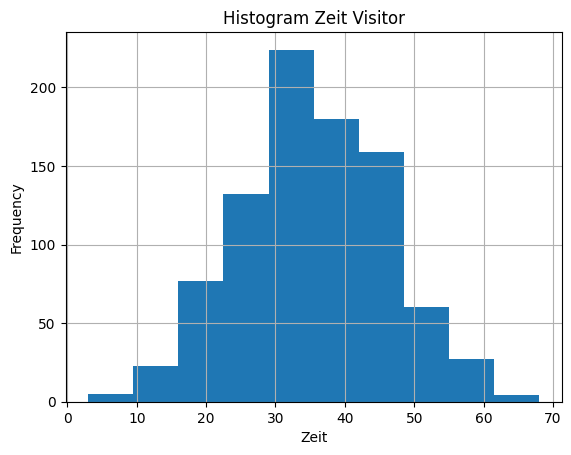

In [52]:
visitor_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit Visitor')
plt.show()

In [53]:
q1 = visitor_geo_retype['Zeit'].quantile(0.25)
q3 = visitor_geo_retype['Zeit'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = 10
upper_bound = 90

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

outliers = visitor_geo_retype[(visitor_geo_retype['Zeit'] < lower_bound) | (visitor_geo_retype['Zeit'] > upper_bound)]
print("Ausreißer:")
print(outliers)

non_outliers_mean = visitor_geo_retype[(visitor_geo_retype['Zeit'] >= lower_bound) & (visitor_geo_retype['Zeit'] <= upper_bound)]['Zeit'].mean()

visitor_geo_retype['Zeit'] = visitor_geo_retype['Zeit'].apply(lambda x: non_outliers_mean if x < lower_bound or x > upper_bound else x)

print(visitor_geo_retype.describe())

Untergrenze: 10
Obergrenze: 90
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen  Zeit        Niederlassung
52    K1157           0     30   30096.84     8            Thüringen
91    K1196           1     43   37696.63     7        Niedersachsen
442   K1547           1     40   39581.25     5        Niedersachsen
518   K1623           1     31   38298.53     3  Nordrhein-Westfalen
864   K1969           1     51   70533.44     7    Baden-Württemberg
       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936049   35.330700
std      0.494156   11.865889   16164.358263   10.243995
min      0.000000   30.000000   10802.030000   10.000000
25%      0.000000   40.000000   47816.610000   28.000000
50%      1.000000   49.000000   59163.820000   35.000000
75%      1.000000   60.000000   71001.380000   43.000000
max      1.000000   70.000000  108569.090000   68.000000


In [54]:
print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 10 Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

Wir setzen die Untergrenze in Sachen 'Zeit' auf 10 Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.
Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,
dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und
länger überlegende Kunden im Geschäft zu haben.
Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.


In [55]:
print(customer_geo_retype.describe())
print(customer_geo_retype)
print(
)
print(visitor_geo_retype.describe())
print(visitor_geo_retype)

        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1104.000000  1104.000000    1104.000000    1104.000000  1104.000000
mean      0.637681    50.375000   58841.233212   88975.198714    44.372495
std       0.480888    11.951426   16603.953365   24464.067781    10.582091
min       0.000000    30.000000       0.000000   21471.650000    15.000000
25%       0.000000    40.000000   46662.750000   70609.422500    37.000000
50%       1.000000    51.000000   59011.500000   88931.455000    44.000000
75%       1.000000    61.000000   70281.750000  107093.375000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    74.000000
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1   68.0    89437.0  114481.90  62.0   
1      K0002           1   58.0    65271.0  106258.99  44.0   
2      K0003           1   44.0    48195.0   85705.57  29.0   
3      K0004           0   37.0    48957.0   76412.36  36.0   
4      K00

In [61]:
customer_geo_retype.index

Index(['K0001', 'K0002', 'K0003', 'K0004', 'K0005', 'K0006', 'K0007', 'K0008',
       'K0009', 'K0010',
       ...
       'K1095', 'K1096', 'K1097', 'K1098', 'K1099', 'K1100', 'K1101', 'K1102',
       'K1103', 'K1104'],
      dtype='object', name='KundeNr', length=1104)

In [64]:
# KundeNr als Index setzen
customer_geo_retype.set_index('KundeNr', inplace=True)
visitor_geo_retype.set_index('KundeNr', inplace=True)

# Auswahl der gewünschten Spalten
customer_geo_retype = customer_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
visitor_geo_retype = visitor_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([customer_geo_retype, visitor_geo_retype])

# Ausgabe des resultierenden DataFrames
print(df)

         Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                    
K0001             1   68.0   89437.00              Sachsen  62.0  114481.90
K0002             1   58.0   65271.00  Nordrhein-Westfalen  44.0  106258.99
K0003             1   44.0   48195.00               Hessen  29.0   85705.57
K0004             0   37.0   48957.00               Bayern  36.0   76412.36
K0005             0   50.0   56621.00               Bayern  40.0   92898.67
...             ...    ...        ...                  ...   ...        ...
K1991             1   48.0   59967.31               Hessen  21.0        NaN
K1992             1   67.0   81521.76    Baden-Württemberg  21.0        NaN
K1993             0   40.0   41616.57  Nordrhein-Westfalen  48.0        NaN
K1994             1   49.0   76602.79               Berlin  19.0        NaN
K1995             1   49.0   54754.53               Berlin  44.0        NaN

[1995 rows 

In [65]:
all_customer_numbers = [f'K{str(i).zfill(4)}' for i in range(1, 1996)]

# Finden der fehlenden Kundennummern
missing_customer_numbers = set(all_customer_numbers) - set(df.index)

# Ausgabe der fehlenden Kundennummern
print("Fehlende Kundennummern:")
print(sorted(missing_customer_numbers))
all_customer_numbers = [f'K{str(i).zfill(4)}' for i in range(1, 1996)]

# Finden der fehlenden Kundennummern
missing_customer_numbers = sorted(set(all_customer_numbers) - set(df.index))

# Erstellen eines DataFrames mit den fehlenden Kundennummern
missing_df = pd.DataFrame(index=missing_customer_numbers, columns=df.columns)
missing_df.index.name = 'KundeNr'

# Ausgabe der fehlenden Kundennummern als fehlende Zeilen
print("Fehlende Zeilen:")
print(missing_df)

Fehlende Kundennummern:
[]
Fehlende Zeilen:
Empty DataFrame
Columns: [Geschlecht, Alter, Einkommen, Niederlassung, Zeit, Preis]
Index: []


In [66]:
print(customer_geo_retype)

# Erstellen eines neuen Indexes von K1006 bis K1896
new_index = [f'K{i:04d}' for i in range(1006, 1006 + len(visitor_geo_retype))]

# Setzen des neuen Indexes
visitor_geo_retype.index = new_index
print(visitor_geo_retype)

         Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                    
K0001             1   68.0    89437.0              Sachsen  62.0  114481.90
K0002             1   58.0    65271.0  Nordrhein-Westfalen  44.0  106258.99
K0003             1   44.0    48195.0               Hessen  29.0   85705.57
K0004             0   37.0    48957.0               Bayern  36.0   76412.36
K0005             0   50.0    56621.0               Bayern  40.0   92898.67
...             ...    ...        ...                  ...   ...        ...
K1100             1   61.0    82624.0               Berlin  59.0  134755.80
K1101             1   39.0    37905.0               Hessen  32.0   61717.86
K1102             1   39.0    40159.0        Niedersachsen  37.0   67170.69
K1103             0   48.0    45545.0               Berlin  30.0   75700.83
K1104             1   63.0    80414.0              Sachsen  49.0  101554.64

[1104 rows 

In [130]:
# Auswahl der gewünschten Spalten
customer_geo_retype = customer_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
visitor_geo_retype = visitor_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([customer_geo_retype, visitor_geo_retype])

# Entfernen von Zeilen mit fehlenden Werten (optional, wenn notwendig)
df.dropna(how='all', inplace=True)

# Ausgabe des DataFrames mit dem neuen Index
print(df)

# Filtern der Zeilen von 'K1004' bis 'K1105'
filtered_df = df.loc['K1004':'K1105']

# Anzeigen der gefilterten Zeilen
print(filtered_df)

      Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K0001   Männlich   68.0   89437.00              Sachsen  62.0  114481.90
K0002   Männlich   58.0   65271.00  Nordrhein-Westfalen  44.0  106258.99
K0003   Männlich   44.0   48195.00               Hessen  29.0   85705.57
K0004   Weiblich   37.0   48957.00               Bayern  36.0   76412.36
K0005   Weiblich   50.0   56621.00               Bayern  40.0   92898.67
...          ...    ...        ...                  ...   ...        ...
K1892   Männlich   48.0   59967.31               Hessen  21.0        NaN
K1893   Männlich   67.0   81521.76    Baden-Württemberg  21.0        NaN
K1894   Weiblich   40.0   41616.57  Nordrhein-Westfalen  48.0        NaN
K1895   Männlich   49.0   76602.79               Berlin  19.0        NaN
K1896   Männlich   49.0   54754.53               Berlin  44.0        NaN

[1995 rows x 6 columns]
      Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K1004   Männlich   42.0   

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, K0001 to K1896
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geschlecht     1995 non-null   int64  
 1   Alter          1995 non-null   float64
 2   Einkommen      1995 non-null   float64
 3   Niederlassung  1995 non-null   object 
 4   Zeit           1995 non-null   float64
 5   Preis          1104 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 173.6+ KB
None


In [69]:
# Ensure that the 'Geschlecht', 'Alter', and 'Zeit' columns are of integer type
df = df.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})

# Replace 1 with 'Männlich' and 0 with 'Weiblich' in the 'Geschlecht' column
df['Geschlecht'] = df['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})

# Display the updated dataframe
print(df)
print(
    )
print(df.dtypes)

      Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K0001   Männlich     68   89437.00              Sachsen    62  114481.90
K0002   Männlich     58   65271.00  Nordrhein-Westfalen    44  106258.99
K0003   Männlich     44   48195.00               Hessen    29   85705.57
K0004   Weiblich     37   48957.00               Bayern    36   76412.36
K0005   Weiblich     50   56621.00               Bayern    40   92898.67
...          ...    ...        ...                  ...   ...        ...
K1892   Männlich     48   59967.31               Hessen    21        NaN
K1893   Männlich     67   81521.76    Baden-Württemberg    21        NaN
K1894   Weiblich     40   41616.57  Nordrhein-Westfalen    48        NaN
K1895   Männlich     49   76602.79               Berlin    19        NaN
K1896   Männlich     49   54754.53               Berlin    44        NaN

[1995 rows x 6 columns]

Geschlecht        object
Alter              int64
Einkommen        float64
Niederlassung     objec

In [70]:
customer_geo_retype['Geschlecht'] = customer_geo_retype['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})
visitor_geo_retype['Geschlecht'] = visitor_geo_retype['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})
Kunden = customer_geo_retype
Besucher = visitor_geo_retype
print("Final Tabelle Kundendaten")
print(Kunden)
print(Kunden.describe())
print(
)
print("Finale Tabelle Besucherdaten")
print(Besucher)
print(Besucher.describe())

Final Tabelle Kundendaten
        Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                   
K0001     Männlich   68.0    89437.0              Sachsen  62.0  114481.90
K0002     Männlich   58.0    65271.0  Nordrhein-Westfalen  44.0  106258.99
K0003     Männlich   44.0    48195.0               Hessen  29.0   85705.57
K0004     Weiblich   37.0    48957.0               Bayern  36.0   76412.36
K0005     Weiblich   50.0    56621.0               Bayern  40.0   92898.67
...            ...    ...        ...                  ...   ...        ...
K1100     Männlich   61.0    82624.0               Berlin  59.0  134755.80
K1101     Männlich   39.0    37905.0               Hessen  32.0   61717.86
K1102     Männlich   39.0    40159.0        Niedersachsen  37.0   67170.69
K1103     Weiblich   48.0    45545.0               Berlin  30.0   75700.83
K1104     Männlich   63.0    80414.0              Sachsen  49.0  101554.64

In [ ]:
# Aufgabe 1: Wie viele Autos wurden verkauft?

In [71]:
verkaufte_Autos = df[df['Preis'].notna()]
Anzahl_verkaufter_Autos = len(verkaufte_Autos)

print(f"Es wurden {Anzahl_verkaufter_Autos} Autos verkauft.")

Es wurden 1104 Autos verkauft.


In [ ]:
# Aufgabe 2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [72]:
# Min, Max und Mean der Spalte 'Preis'
preis_min = df['Preis'].min()
preis_max = df['Preis'].max()
preis_mean = df['Preis'].mean().round(2)

# Ausgabe der Ergebnisse
print(f"Der Mindestpreis ist:          {preis_min:,}€")
print(f"Der Maximalpreis ist:         {preis_max:,}€")
print(f"Der Durchschnittspreis ist:    {preis_mean:,}€")

Der Mindestpreis ist:          21,471.65€
Der Maximalpreis ist:         165,482.31€
Der Durchschnittspreis ist:    88,975.2€


In [ ]:
# Aufgabe 3: Wie hoch war der Gesamtumsatz?

In [73]:
Gesamtumsatz = df['Preis'].sum()
print(f"Der Gesamtumsatz liegt bei: {Gesamtumsatz:,}€")

Der Gesamtumsatz liegt bei: 98,228,619.38€


In [ ]:
# Aufgabe 4: Wie viele Autos wurden pro Bundesland verkauft?

In [74]:
# Niederlassungen gruppieren, dann zählen 
df_numbers = df.groupby(df.Niederlassung).count()
df_numbers = df_numbers.Preis
print(df_numbers)

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Düsseldorf               1
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    174
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64


In [ ]:
# Aufgabe 5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [75]:
# Niederlassungen gruppieren, Durchschnittspreis nehmen, Werte sortieren
df.groupby(df.Niederlassung) \
    .Preis.mean() \
    .sort_values() \
    .round(2)

Niederlassung
Hamburg                 85549.50
Hessen                  85864.93
Brandenburg             86673.64
Niedersachsen           87963.31
Nordrhein-Westfalen     88451.76
Bayern                  89344.31
Sachsen                 89455.08
Berlin                  89584.98
Thüringen               90816.99
Baden-Württemberg       90969.56
Düsseldorf             120215.50
Name: Preis, dtype: float64

Text(0, 0.5, 'Revenue')

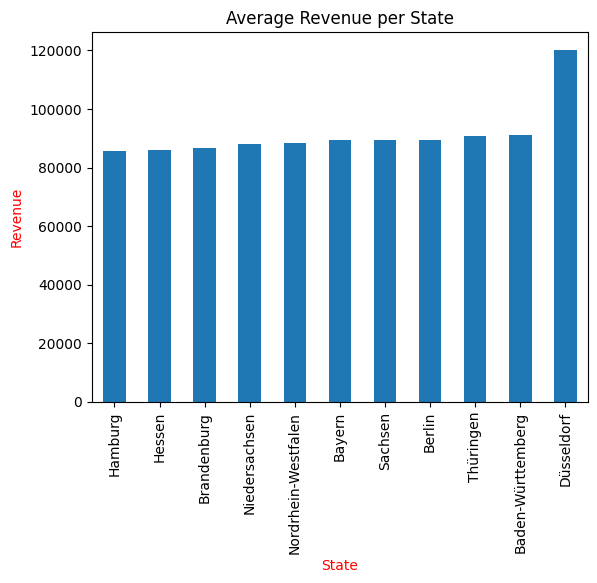

In [76]:
# Abbildung erstellen. 

avg_umsatz = df.groupby(df.Niederlassung) \
    .Preis.mean() \
    .sort_values() \
    .round(2).plot(kind="bar", title="Average Revenue per State")
plt.xlabel("State", color="r")
plt.ylabel("Revenue", color="r")


In [ ]:
# Aufgabe 6: In welchem Bundesland wurde das teuerste Auto verkauft?

In [77]:
df.groupby(df.Niederlassung).Preis.max().head(1)

Niederlassung
Baden-Württemberg    144045.32
Name: Preis, dtype: float64

In [ ]:
# Aufgabe 7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [ ]:
# Aufgabe 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

In [ ]:
# Aufgabe 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [ ]:
# Aufgabe 10: Bestimmen Sie, ob es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden 
#             und dem Durchschnittseinkommen der Besucher gibt.

In [78]:
from scipy.stats import ttest_ind

# Beispielgruppen aus den beiden DataFrames
einkommen_der_kunden = customer_geo_retype['Einkommen']
einkommen_der_besucher = visitor_geo_retype['Einkommen']

# Welch-T-Test
t_stat, p_value = ttest_ind(einkommen_der_kunden, einkommen_der_besucher, equal_var=False)

print(f"Welch's T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

Welch's T-Statistik: -0.7147880334114172
P-Wert: 0.4748267082926213


In [ ]:
# Aufgabe 11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

In [79]:
correlation_matrix = df[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# Ausgabe der Korrelationsmatrix
print("Korrelationsmatrix (Pearson-Korrelation):")
print(correlation_matrix)
correlation_list = correlation_matrix.values.flatten().tolist()
correlation_list = [round(coeff, 2) for coeff in correlation_list]
print(
)
print("Hinweis: Die Funktion .corr('method='pearson') ignoriert alle Wertepaare bei denen ein Wert NaN ist.")
print(
)
alter_einkommen = "positive Korrelation. Ältere Personen tendieren dazu, höhere Einkommen zu haben."
alter_preis = "starke positive Korrelation. Ältere Personen neigen dazu, höhere Preise zu zahlen."
alter_zeit = "schwache positive Korrelation. Ältere Personen bleiben tendenziell etwas länger im Geschäft."
einkommen_preis = "sehr starke positive Korrelation. Personen mit höherem Einkommen tendieren dazu, höhere Preise zu zahlen."
einkommen_zeit = "moderate positive Korrelation. Personen mit höherem Einkommen bleiben tendenziell länger im Geschäft."
preis_zeit = "moderate positive Korrelation. Höhere Preise korrelieren mit einer tendenziell höheren Vorgangszeit."

KE_AE = correlation_list[1]
KE_AP = correlation_list[2]
KE_AZ = correlation_list[3]
KE_EP = correlation_list[6]
KE_EZ = correlation_list[7]
KE_PZ = correlation_list[11]
print("Interpretation der jeweiligen Korrelationskoefizienten")
print(
)
print("Alter - Einkommen korreliert mit:", KE_AE)
print(alter_einkommen)
print(
)
print("Alter - Preis korreliert mit", KE_AP)
print(alter_preis)
print(
)
print("Alter - Zeit korreliert mit", KE_AZ)
print(alter_zeit)
print(
)
print("Einkommen - Preis korreliert mit", KE_EP)
print(einkommen_preis)
print(
)
print("Einkommen - Preis korreliert mit", KE_EZ)
print(einkommen_zeit)
print(
)
print("Preis - Zeit korreliert mit", KE_PZ)
print(preis_zeit)

Korrelationsmatrix (Pearson-Korrelation):
              Alter  Einkommen     Preis      Zeit
Alter      1.000000   0.783247  0.780478  0.305881
Einkommen  0.783247   1.000000  0.886670  0.383306
Preis      0.780478   0.886670  1.000000  0.698215
Zeit       0.305881   0.383306  0.698215  1.000000

Hinweis: Die Funktion .corr('method='pearson') ignoriert alle Wertepaare bei denen ein Wert NaN ist.

Interpretation der jeweiligen Korrelationskoefizienten

Alter - Einkommen korreliert mit: 0.78
positive Korrelation. Ältere Personen tendieren dazu, höhere Einkommen zu haben.

Alter - Preis korreliert mit 0.78
starke positive Korrelation. Ältere Personen neigen dazu, höhere Preise zu zahlen.

Alter - Zeit korreliert mit 0.31
schwache positive Korrelation. Ältere Personen bleiben tendenziell etwas länger im Geschäft.

Einkommen - Preis korreliert mit 0.89
sehr starke positive Korrelation. Personen mit höherem Einkommen tendieren dazu, höhere Preise zu zahlen.

Einkommen - Preis korreliert mit 

In [ ]:
# Aufgabe 12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.

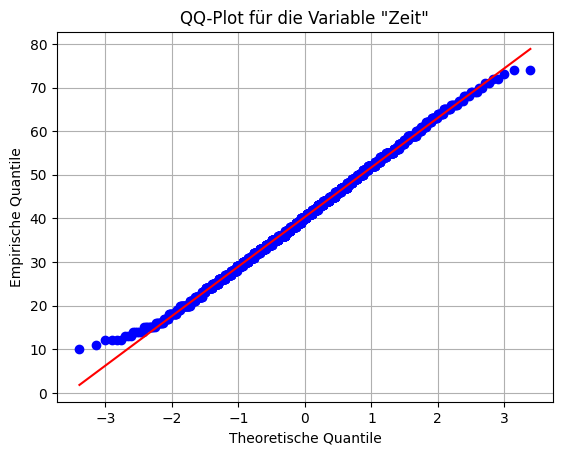

In [80]:
# QQ-Plot für die Variable "Zeit"
zeit = df['Zeit'].dropna()

# QQ-Plot erstellen
stats.probplot(zeit, dist="norm", plot=plt)
plt.title('QQ-Plot für die Variable "Zeit"')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Empirische Quantile')
plt.grid(True)

In [ ]:
# Aufgabe 13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen?
#             Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir können davon aus
#             gehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit
#             aufgenommen haben.

In [82]:
# Einkommen > Preis = Anzahl
no_credit_customers = df[df['Einkommen'] > df['Preis']].shape[0]
print(f"Anzahl der Kunden ohne Bankkredit: {no_credit_customers}")

Anzahl der Kunden ohne Bankkredit: 5


In [ ]:
# Aufgabe 14: Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Wählen Sie die geeigneten
#             unabhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

In [ ]:
df.head()

In [90]:
df.index

Index(['K0001', 'K0002', 'K0003', 'K0004', 'K0005', 'K0006', 'K0007', 'K0008',
       'K0009', 'K0010',
       ...
       'K1887', 'K1888', 'K1889', 'K1890', 'K1891', 'K1892', 'K1893', 'K1894',
       'K1895', 'K1896'],
      dtype='object', length=1995)

/var/folders/ts/wd0xmbjx59v9bnn6pvtdfz780000gn/T/ipykernel_23611/1832953665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Filter the DataFrame to include only the rows with customer numbers
df_clean = df[df.index.isin(customer_geo['KundeNr'])]
df_clean.dropna(inplace=True)
# Assuming 'df' is your DataFrame
X = df_clean[['Alter', 'Einkommen', 'Geschlecht']]
y = df_clean['Preis']

# Convert categorical variable 'Geschlecht' into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Add constant term for intercept
X = sm.add_constant(X)

# Convert y to a numpy array and ensure it's a 1-dimensional array
y = np.asarray(y).astype(float)

# Convert X to a numpy array and ensure all values are numeric
X = np.asarray(X).astype(float)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1646.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:14:36   Log-Likelihood:                -11782.
No. Observations:                1104   AIC:                         2.357e+04
Df Residuals:                    1100   BIC:                         2.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3056.0538   1398.320      2.186      0.0

/var/folders/ts/wd0xmbjx59v9bnn6pvtdfz780000gn/T/ipykernel_23611/1028756945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1646.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:18:49   Log-Likelihood:                -11782.
No. Observations:                1104   AIC:                         2.357e+04
Df Residuals:                    1100   BIC:                         2.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3056.0538   1398.320      2.186      0.029     312.379    5799.729
x1           538.1019     39.983     13.458      0.000     459.651     616.553
x2             1.0133      0.029     35.199      0.000       0.957       1.070
x3         -2246.3385    655.053     -3.429      0.001   -3531.633    -961.044
==============================================================================
Omnibus:                      133.768   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.550
Skew:                           0.477   Prob(JB):                    2.37e-131
Kurtosis:                       6.488   Cond. No.                     2.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
alpha = model.params[0]
print("Der Achsenabschnitt beträgt:", alpha)

Der Achsenabschnitt beträgt: 3056.053775970705


In [110]:
beta_1 =  model.params[1]
print("Der Koeffizient für Alter beträgt:", beta_1)

Der Koeffizient für Alter beträgt: 538.1019464538566


In [109]:
beta_2 = model.params[2]
print("Der Koefizient für Einkommen beträgt:", beta_2)

Der Koefizient für Einkommen beträgt: 1.0133395730127157


In [106]:
r_squared = model.rsquared
print("Die Variable Alter und Einkommen erklären " + str(round(r_squared, 2) * 100) + "% der Variabilität beim Preis.")

Die Variable Alter und Einkommen erklären 82.0% der Variabilität beim Preis.


In [ ]:
alpha = reg_res.params["const"]
print("Der Achsenabschnitt beträgt: " + str(round(alpha, 2)))

In [ ]:
beta1 = reg_res.params["Alter"]
print("Eine Erhöhung des Alters um ein Jahr führt zu einer Zunahme des Kaufpreises um: " + str(round(beta1, 2)))

In [ ]:
beta2 = reg_res.params["Einkommen"]
print("Eine Erhöhung des Einkommens um einen Euro führt zu einer Zunahme des Kaufpreises um: " + str(round(beta2, 2)))

In [ ]:
r_squared = reg_res.rsquared
print("Die Variablen Alter und Einkommen erklären " + str(round(r_squared, 2)*100) + "% der Variabilität beim Preis")

In [ ]:
# Aufgabe 15: Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im
#             Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis
#             preis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit
#             einem Einkommen von 54.000 Euro.

In [111]:
P_höherals_E = Kunden[Kunden['Preis'] > Kunden['Einkommen']]

# Filtern nach Zeilen, wo Alter den Wert 32 hat
P_höherals_E_32 = P_höherals_E[(P_höherals_E['Alter'] == 32) & (P_höherals_E['Geschlecht'] == 'Männlich')]
Kunden_32 = Kunden[(Kunden['Alter'] == 32) & (Kunden['Geschlecht'] == 'Männlich')]

print(Kunden_32)
print("\nZeilen, wo Alter den Wert 32 hat:")
print(P_höherals_E_32)


        Geschlecht  Alter  Einkommen        Niederlassung  Zeit     Preis
KundeNr                                                                  
K0015     Männlich   32.0    43022.0              Sachsen  36.0  50811.55
K0031     Männlich   32.0    40277.0               Bayern  34.0  42093.26
K0115     Männlich   32.0    42406.0  Nordrhein-Westfalen  39.0  45125.20
K0158     Männlich   32.0    52664.0    Baden-Württemberg  53.0  72598.33
K0175     Männlich   32.0    50330.0               Bayern  27.0  49540.28
K0213     Männlich   32.0    43819.0              Sachsen  47.0  57548.45
K0246     Männlich   32.0    40729.0    Baden-Württemberg  33.0  54787.08
K0316     Männlich   32.0    53135.0    Baden-Württemberg  53.0  81152.36
K0320     Männlich   32.0    31090.0    Baden-Württemberg  29.0  59413.64
K0447     Männlich   32.0    30856.0  Nordrhein-Westfalen  18.0  27934.83
K0566     Männlich   32.0    26878.0               Bayern  36.0  50126.60
K0598     Männlich   32.0    38008.0  

In [112]:
# Import necessary libraries
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Prepare data for regression
X = customer_data[['Alter', 'Einkommen']]
y = customer_data['Preis']  # Assuming 'Preis' column is the target variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predicted_price_32_30000 = model.predict([[32, 30000]])
predicted_price_51_54000 = model.predict([[51, 54000]])






ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Aufgabe 16: In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am
#             meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen
#             direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [ ]:
ff

In [ ]:
# 16. Variable, die den Preis des Autos am meisten beeinflusst (Regressionskoeffizienten)
coefficients = model.coef_

# Display the results
predicted_price_32_30000, predicted_price_51_54000, coefficients


In [ ]:
# Aufgabe 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt.
#             Verwenden Sie die entsprechende Methode.

In [ ]:
ff

In [ ]:
from sklearn.linear_model import LogisticRegression

# For logistic regression, we need a binary target variable.
# We'll create a binary target variable for demonstration purposes.
# Assuming 'Zeit' > 30 indicates a purchase (1), and 'Zeit' <= 30 indicates no purchase (0)
data['Purchase'] = (data['Zeit'] > 30).astype(int)

# Features and target variable
X_log = data[['Alter', 'Einkommen']]
y_log = data['Purchase']

# Fit a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_log, y_log)

# Display the coefficients
log_coefficients = log_model.coef_

In [118]:
df

,Geschlecht,Alter,Einkommen,Niederlassung,Zeit,Preis
K0001,Männlich,68,89437.00,Sachsen,62,114481.90
K0002,Männlich,58,65271.00,Nordrhein-Westfalen,44,106258.99
K0003,Männlich,44,48195.00,Hessen,29,85705.57
K0004,Weiblich,37,48957.00,Bayern,36,76412.36
K0005,Weiblich,50,56621.00,Bayern,40,92898.67
...,...,...,...,...,...,...
K1892,Männlich,48,59967.31,Hessen,21,NaN
K1893,Männlich,67,81521.76,Baden-Württemberg,21,NaN
K1894,Weiblich,40,41616.57,Nordrhein-Westfalen,48,NaN
K1895,Männlich,49,76602.79,Berlin,19,NaN


In [129]:
len(df)

1104

In [133]:
df2 = df.copy()

In [141]:
df2.isna().mean()

Geschlecht       0.0
Alter            0.0
Einkommen        0.0
Niederlassung    0.0
Zeit             0.0
Preis            0.0
Kauf             0.0
dtype: float64

In [145]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Drop rows with missing values
df2.dropna(inplace=True)

# Create binary target variable 'Kauf'
df2['Kauf'] = np.where(df2.index.isin(customer_geo['KundeNr']), 1, 0)

# Prepare independent variables
X_logit = df2[['Alter', 'Einkommen', 'Zeit', 'Geschlecht']]

# Convert categorical variable 'Geschlecht' into dummy/indicator variables
X_logit = pd.get_dummies(X_logit, drop_first=True)

# Add constant term for intercept
X_logit = sm.add_constant(X_logit)

# Prepare dependent variable
y_logit = df2['Kauf']

# Fit the logistic regression model
logit_model = sm.Logit(np.asarray(y_logit).astype(float), np.asarray(X_logit).astype(float)).fit()

# Print the summary of the model
print(logit_model.summary())


         Current function value: inf
         Iterations: 35


/Users/stheno/git/nhi/.venv/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/stheno/git/nhi/.venv/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/stheno/git/nhi/.venv/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/stheno/git/nhi/.venv/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, cat

LinAlgError: Singular matrix

In [142]:
# Exercise 17: Logistic regression for purchase probability
# Add a binary target variable 'Kauf' to besucher_df where 1 indicates purchase
from sklearn.linear_model import LogisticRegression

#df_clean = df[df.index.isin(customer_geo['KundeNr'])]

df2.dropna(inplace=True)
#df['Kauf'] = df.index.isin(customer_geo['KundeNr']).astype(int)
df2['Kauf'] = np.where(df2.index.isin(customer_geo['KundeNr']), 1, 0)
X_logit = df2[['Alter', 'Einkommen', 'Zeit', 'Geschlecht']]
y_logit = df2['Kauf']
X_logit = sm.add_constant(X_logit)
#logit_model = sm.Logit(y_logit, X_logit).fit()
#logit_model = LogisticRegression()
logit_model = sm.Logit(np.asarray(y_logit), np.asarray(X_logit)).fit()
#logit_model.fit(X_logit, y_logit)
print(logit_model.summary())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [116]:
# Exercise 18: Purchase probability for specific visitors
# For 32-year-old male with 30,000 Euro income and 30 minutes test time
new_visitor_1 = pd.DataFrame({'const': [1], 'Alter': [32], 'Einkommen': [30000], 'Zeit': [30], 'Geschlecht': [1]})
purchase_prob_1 = logit_model.predict(new_visitor_1)

# For 51-year-old male with 54,000 Euro income and 45 minutes test time
new_visitor_2 = pd.DataFrame({'const': [1], 'Alter': [51], 'Einkommen': [54000], 'Zeit': [45], 'Geschlecht': [1]})
purchase_prob_2 = logit_model.predict(new_visitor_2)

print(f"Wahrscheinlichkeit des Kaufs für 32-jährigen Besucher: {purchase_prob_1.iloc[0]}")
print(f"Wahrscheinlichkeit des Kaufs für 51-jährigen Besucher: {purchase_prob_2.iloc[0]}")

Wahrscheinlichkeit des Kaufs für 32-jährigen Besucher: 9.411452584026452e-15
Wahrscheinlichkeit des Kaufs für 51-jährigen Besucher: 1.2075214654073497e-17


In [ ]:
# Aufgabe 18: Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem
#             Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer
#             Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde
#             mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines
#             unserer Modelle kauft?

In [113]:
# Personen erstellen
im_kunde1 = {'Alter': 32,'Einkommen': 30000,'Zeit': 30}
im_kunde2 = {'Alter': 51,'Einkommen': 54000,'Zeit': 45}

# DataFrame erstellen
X_predict_kunde1 = pd.DataFrame([neuer_kunde1])
X_predict_kunde2 = pd.DataFrame([neuer_kunde2])

# Hinzufügen des konstanten Terms
X_predict_kunde1 = sm.add_constant(X_predict_kunde1, has_constant='add')
X_predict_kunde2 = sm.add_constant(X_predict_kunde2, has_constant='add')

# Predict Probabilities
predicted_probability_kunde1 = logit_model.predict(X_predict_kunde1)
predicted_probability_kunde2 = logit_model.predict(X_predict_kunde2)

print(f"Probability assumed customer 1: {predicted_probability_kunde1[0]:.2f}")
print(f"Probability assumed customer 1: {predicted_probability_kunde2[0]:.2f}")

NameError: name 'neuer_kunde1' is not defined

In [ ]:
# Aufgabe 19: Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen
#             len Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten
#             durchgeführt haben.

In [ ]:
# Aufgabe 20: Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen?
#             Welche zusätzlichen Informationen sollten gesammelt werden? 
#             Formulieren Sie zwei Vorschläge.

In [ ]:
...